### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

### Read Dataset

In [2]:
dataset = pd.read_csv('Alldataset_combined.csv')
dataset.head()

,SERVICE,SPORT,DPORT,TTL,IP_LENGTH,IP_CEKSUM,IP_ID,IP_OFF,TCP/UDP/ICMP_LENGTH,PROTOCOL,LABELS
0,1,8801,56911,51,141,55545,19391,16384,121,1,1
1,1,55308,8801,128,227,63860,46961,0,207,1,0
2,1,57837,8801,128,295,15459,24846,0,275,1,1
3,1,8801,56913,51,59,8128,1355,16384,39,1,1
4,1,57838,8801,128,917,1837,37846,0,897,1,1


### Split for Features dan Labels (X and Y)

In [3]:
features = dataset.iloc[:, 0:10].values
labels = dataset.iloc[:, 10].values

### About Labels (Y)
1. 0 = 65966 Data (Less)
2. 1 = 119030 Data (Good)

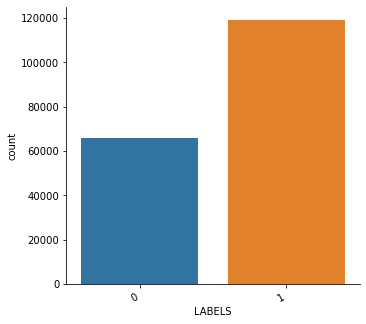

In [4]:
ax = sns.catplot(x='LABELS', kind='count', data=dataset, orient="h")
ax.fig.autofmt_xdate()

### Split for Training Data and Testing Data

In [5]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, stratify = labels)

### Data Normalization with Scaler (MinMaxScaler)

In [6]:
scaler = MinMaxScaler()
features_train = scaler.fit_transform(train_features)
features_test = scaler.transform(test_features)

### Total Data (Training and Testing)

In [7]:
#Jumlah data Training dan data Testing
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (147996, 10)
Training Labels Shape: (147996,)
Testing Features Shape: (37000, 10)
Testing Labels Shape: (37000,)


### Random Forest Model

In [8]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, criterion ="gini")
rf.fit(train_features, train_labels)

train_predict=rf.predict(train_features)
test_predict=rf.predict(test_features)

### Confusion Matrix

In [9]:
training_predicted = rf.predict(train_features)
testing_predicted = rf.predict(test_features)

training_cm = confusion_matrix(train_labels,training_predicted.round())
testing_cm = confusion_matrix(test_labels,testing_predicted.round())

### Result (Output)

In [10]:
print("=== Confusion Matrix ===")
print('\n')
print("= Training CM =")
print(training_cm)
print('\n')
print("= Testing CM =")
print(testing_cm)
print('\n')
print("=== Classification Report (Train) ===")
print(classification_report(train_labels, train_predict))
print('\n')
print("=== Classification Report (Test) ===")
print(classification_report(test_labels, test_predict))
print('\n')
print("=== Accuracy Test (Train) ===")
print(accuracy_score(train_labels, train_predict))
print('\n')
print("=== Accuracy Test (Test) ===")
print(accuracy_score(test_labels, test_predict))
print('\n')

=== Confusion Matrix ===


= Training CM =
[[47245  5528]
 [  296 94927]]


= Testing CM =
[[11815  1378]
 [   82 23725]]


=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     52773
           1       0.94      1.00      0.97     95223

    accuracy                           0.96    147996
   macro avg       0.97      0.95      0.96    147996
weighted avg       0.96      0.96      0.96    147996



=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13193
           1       0.95      1.00      0.97     23807

    accuracy                           0.96     37000
   macro avg       0.97      0.95      0.96     37000
weighted avg       0.96      0.96      0.96     37000



=== Accuracy Test (Train) ===
0.9606475850698668


=== Accuracy Test (Test) ===
0.9605405405405405


